## Data Preprocessing

The quality of the data and the amount of useful information that it contains are key factors that
determine how well a machine learning algorithm can learn

### Identifying missing values in tabular data:


In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
import pandas as pd
from io import StringIO #allows you to treat a string as if it were a file object.
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

Note that you can always access the underlying NumPy array of a
DataFrame via the values attribute

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
# remove rows that contain missing values
df.dropna(axis=0) #remove the corresponding features (columns) or training examples (rows) from the dataset entirely

,A,B,C,D
0,1.0,2.0,3.0,4.0


Similarly, we can drop columns that have at least one NaN in any row by setting the axis argument to 1

In [6]:
# remove COLUMNS that contain missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:

# only drop rows where all columns are NaN
df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# drop rows that have fewer than 3 real values 
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:

# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing missing values:

One of the
most common interpolation techniques is mean imputation, where we simply replace the missing
value with the mean value of the entire feature column.


Other options for the strategy parameter are median or most_frequent, where
the latter replaces the missing values with the most frequent values.

For additional imputation techniques, including the KNNImputer based on a k-nearest
neighbors approach to impute missing features by nearest neighbors

note : ehna hena numpay , ama fillna w heta de pandas 

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np 
imr =SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:

df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Understanding the scikit-learn estimator API:

The fit method is used to learn the parameters from the training data, and the
transform method uses those parameters to transform the data

Any data array that is to be transformed
needs to have the same number of **features** as the data array that was used to fit the model

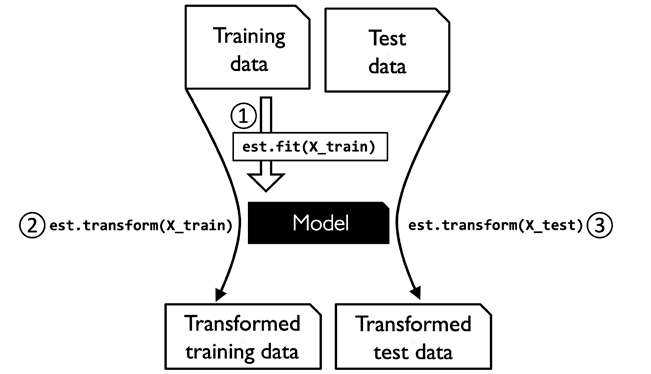

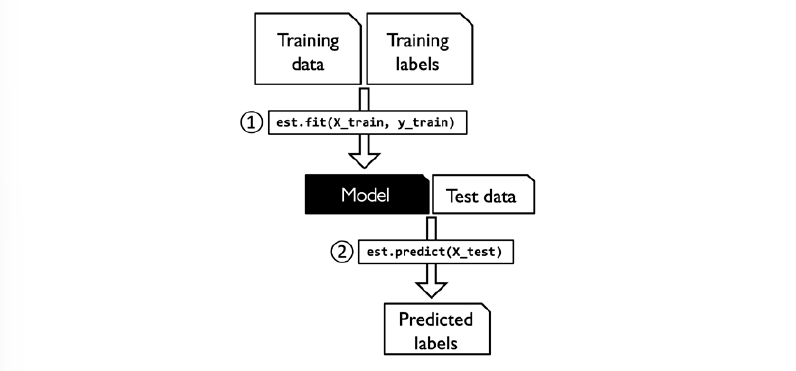

## Handling categorical data:
Ordinal features can be understood as categorical values that can be sorted or ordered.

nominal features don’t imply any order.



 Categorical data encoding with pandas:


In [12]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


Mapping ordinal features

In [13]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


If we want to transform the integer values back to the original string representation at a later stage,
we can simply define a reverse-mapping dictionary

In [14]:

inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

Encoding class labels:

In [15]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in 
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [16]:

# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [17]:

# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


Alternatively, there is a convenient **LabelEncoder** class directly implemented in scikit-learn to achieve
this:

In [18]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

we can use the inverse_transform method to transform the integer class labels back into their original
string representation

In [19]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Performing one-hot encoding on nominal features



In [ ]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder() 
X[:, 0] = color_le.fit_transform(X[:, 0]) #Selects all rows of the first column (X[:, 0]), which is the color column.
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

Although the color values don’t
come in any particular order, common classification models, such as the ones covered in the previous
chapters, will now assume that green is larger than blue, and red is larger than green. Although this
assumption is incorrect, a classifier could still produce useful results. However, those results would
not be optimal.

A common workaround for this problem is to use a technique called **onehotencoding**

create a new dummy feature for each unique value in the nominal feature column

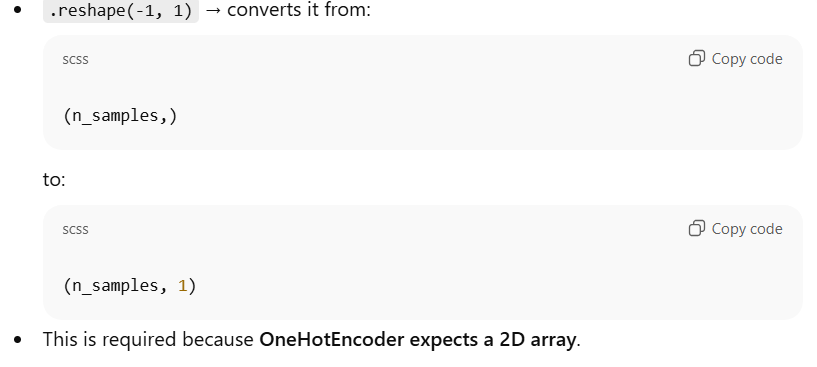

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray() #.toarray() : Converts the sparse matrix into a normal NumPy array.

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

If we want to selectively transform columns in a
multi-feature array, we can use the ColumnTransformer, which accepts a list of (name, transformer,
column(s)) tuples as follows:

In [22]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

get_dummies method implemented in pandas. Applied to a DataFrame, the get_dummies method will
only convert string columns and leave all other columns unchanged:

In [23]:

# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


When we are using one-hot encoding datasets, we have to keep in mind that this introduces multicollinearity,
which can be an issue for certain methods (for instance, methods that require matrix
inversion). If features are highly correlated, matrices are computationally difficult to invert, which
can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply
remove one feature column from the one-hot encoded array. Note that we do not lose any important
information by removing a feature column,

for example, if we remove the column color_blue,
the feature information is still preserved since if we observe color_green=0 and color_red=0, it
implies that the observation must be blue.

In [24]:

# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In order to drop a redundant column via the OneHotEncoder, we need to set drop='first' and set
categories='auto' as follows:

In [25]:

# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

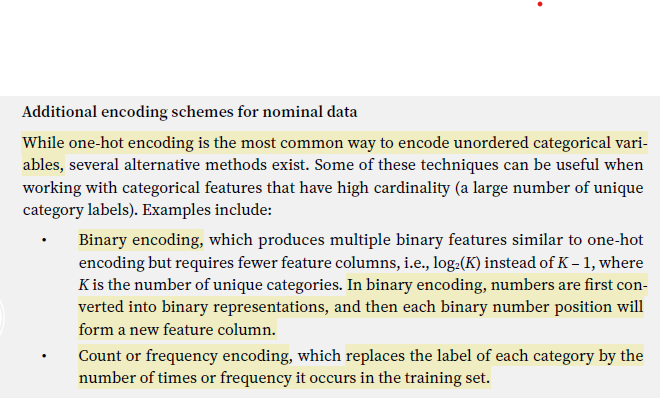

encoding ordinal features :

If we are unsure about the numerical differences between the categories of ordinal features, or the difference between two ordinal values is not defined, we can also encode them using a threshold encoding with 0/1 values. For example, we can split the feature "size" with values M, L, and XL into two new features "x > M" and "x > L". Let's consider the original DataFrame:

In [26]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [27]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [28]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [29]:

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

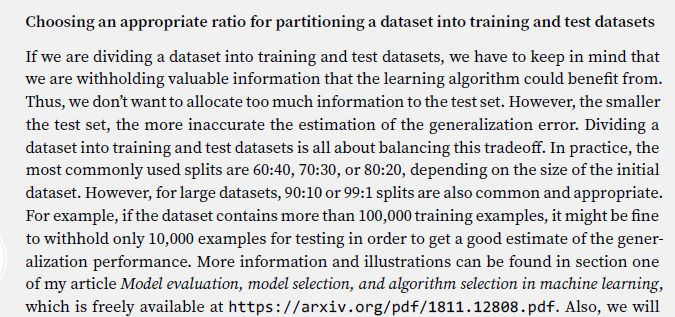

## Bringing features onto the same scale : 
Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. **Decision trees and random forests** are two of the very few machine learning algorithms where we don’t need to
worry about feature scaling.


**normalization** : rescaling of the features
to a range of [0, 1] which is a special case of min-max scaling.

and **standardization** : we center the feature columns at mean 0 with
standard deviation 1 so that the feature columns have the same parameters as a standard normal
distribution (zero mean and unit variance),which makes it easier to learn the weights.

**we shall emphasize that standardization does not change the shape of the distribution, and it does not transform non-normally distributed data into normally distributed data**

standardization maintains useful information about
outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales
the data to a limited range of values.


Other, more advanced methods for feature scaling are available from scikit-learn, such as RobustScaler : recommended if we are working with small datasets that
contain many outliers Similarly, if the machine learning algorithm applied to this dataset is prone
to overfitting, RobustScaler can be a good choice. 

Operating on each feature column independently,
RobustScaler removes the median value and scales the dataset according to the 1st and 3rd quartile of
the dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler
#We do NOT normalize the LABELS (in most cases
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [32]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features:

If we notice that a model performs much better on a training dataset than on the test dataset, this observation
is a strong indicator of overfitting

that the model has a high variance. The reason for the overfitting is that our model is too complex for
the given training data.

Common solutions to reduce the generalization error are as follows:


• Collect more training data
• Introduce a penalty for complexity via regularization
• Choose a simpler model with fewer parameters
• Reduce the dimensionality of the data

**L1 and L2 regularization as penalties against model complexity**

L2 regularization is one approach to reduce the complexity of a
model by penalizing large individual weights.

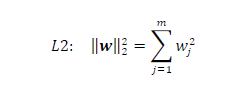

L1 regularization usually yields sparse feature vectors, and most feature
weights will be zero.

Only the most important features keep non-zero weights

All irrelevant or weak features are removed

This is called a sparse feature vector.



Sparsity can be useful in practice if we have a high-dimensional dataset with
many features that are irrelevant,


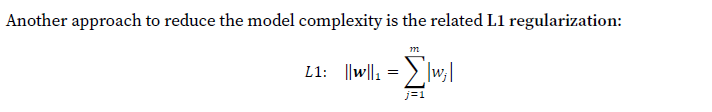


For regularized models in scikit-learn that support L1 regularization, we can simply set the penalty parameter to 'l1' to obtain a sparse solution:




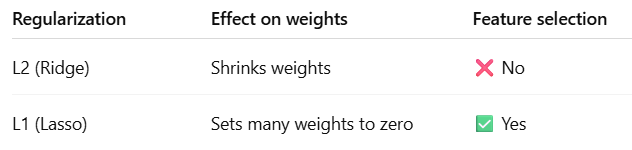

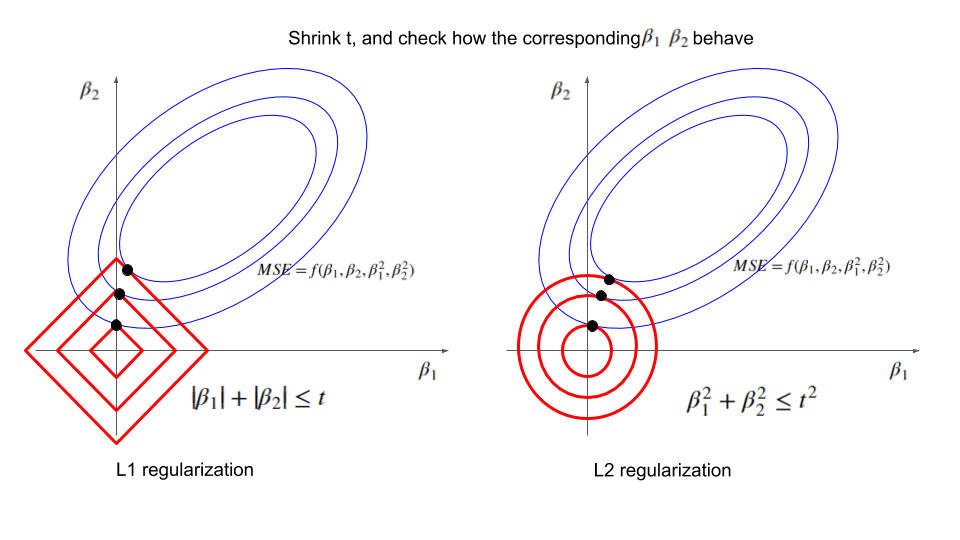

In [ ]:

from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:

from sklearn.linear_model import LogisticRegression
#note solver 'lbfgs' currently does not support L1-regularized loss optimization.
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# weaker or stronger, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


c:\Users\Dell\anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Accessing the bias unit and weight parameters of scikit-learn estimators
In scikit-learn, intercept_ corresponds to the bias unit and coef_ corresponds to the
values wj.

In [35]:
lr.intercept_

array([-1.2631398 , -1.21583563, -2.36957832])

In [36]:
lr.coef_

array([[ 1.24549944,  0.18061242,  0.7426015 , -1.16024905,  0.        ,
         0.        ,  1.1745824 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54184599,  2.51114466],
       [-1.53713883, -0.38730119, -0.99504082,  0.36508841, -0.05971914,
         0.        ,  0.66835598,  0.        ,  0.        , -1.93416603,
         1.23278698,  0.        , -2.23113399],
       [ 0.13536212,  0.16845971,  0.35721602,  0.        ,  0.        ,
         0.        , -2.43725391,  0.        ,  0.        ,  1.56392371,
        -0.81910502, -0.49276109,  0.        ]])

c:\Users\Dell\anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


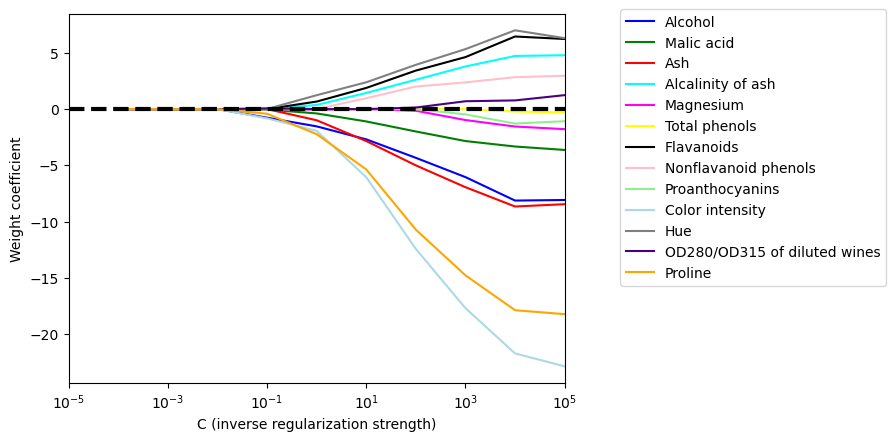

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()


## Sequential feature selection algorithms:

An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality
reduction via feature selection, which is especially useful for unregularized models.

There are two
main categories of dimensionality reduction techniques: **feature selection and feature extraction.**

Via
feature selection, we select a subset of the original features, whereas in feature extraction, we derive
information from the feature set to construct a new feature subspace.


**sequential backward selection (SBS)**, which aims to
reduce the dimensionality of the initial feature subspace with a minimum decay in the performance
of the classifier to improve upon computational efficiency.

SBS can even improve
the predictive power of the model if a model suffers from overfitting.

**Greedy search algorithms**

Greedy algorithms make locally optimal choices at each stage of a combinatorial search
problem and generally yield a suboptimal solution to the problem, in contrast to exhaustive
search algorithms, which evaluate all possible combinations and are guaranteed to find
the optimal solution. However, in practice, an exhaustive search is often computationally
not feasible, whereas greedy algorithms allow for a less complex, computationally more
efficient solution.

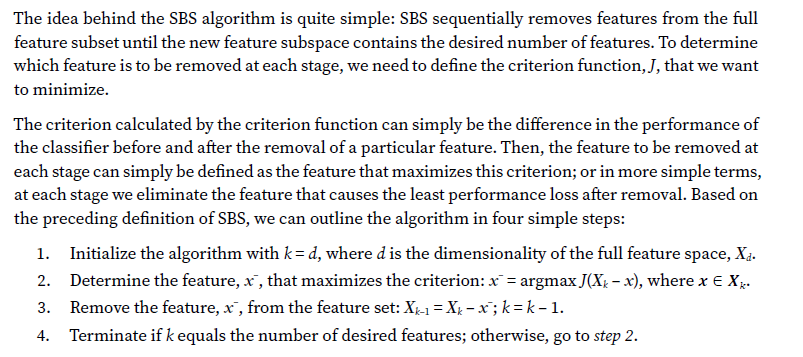



In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]  #gives the number of features (columns) in your training data.
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]

        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)#Computes baseline accuracy using all features.
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []
#Generate all possible feature subsets with one feature removed.
#Train and test the model on each.
#Compute the accuracy_score for each subset.
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]

            self.subsets_.append(self.indices_) #Adds the chosen subset to the history list.
            dim -= 1 #Decreases the number of features by one.

            self.scores_.append(scores[best])  #aves the best score for this stage.
        self.k_score_ = self.scores_[-1] #final accuracy with the selected subset

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

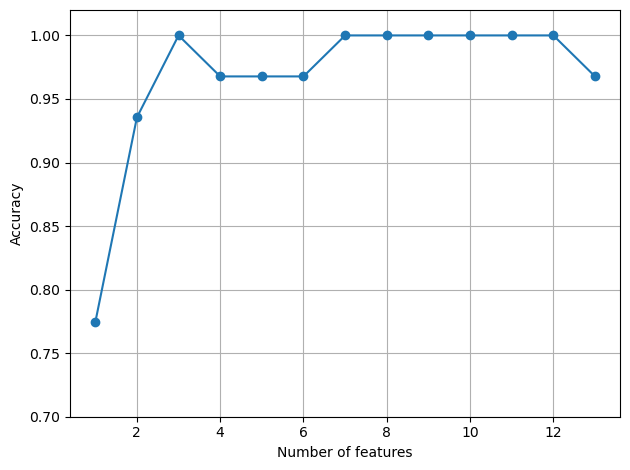

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [40]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [41]:

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [42]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


## Assessing feature importance with random forests:

Using a random forest, we can measure the feature
importance as the averaged impurity decrease computed from all decision trees in the forest, without
making any assumptions about whether our data is linearly separable or not.

the random
forest implementation in scikit-learn already collects the feature importance values for us so that we
can access them via the feature_importances_ attribute after fitting a RandomForestClassifier.

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


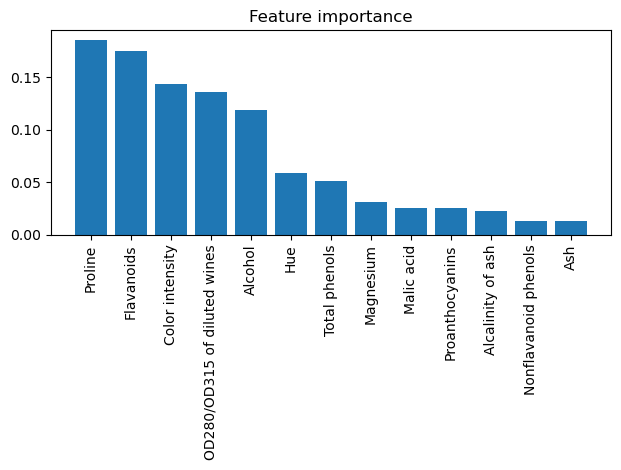

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]  #[::-1] → reverse order (highest importance first)
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

However, as far as interpretability is concerned, the random forest technique comes with an important
gotcha that is worth mentioning. If two or more features are highly correlated, one feature may
be ranked very highly while the information on the other feature(s) may not be fully captured

scikit-learn also implements a **SelectFromModel** object that selects features based on a user-specified
threshold after model fitting, which is useful if we want to use the RandomForestClassifier as
a **feature selector** and intermediate step in a scikit-learn Pipeline object, which allows us to connect
different preprocessing steps with an estimator

Common alternatives:

threshold='mean'

threshold='median'



In [ ]:
# threshold=0.1 Only keep features with importance ≥ 0.1
#prefit=True  , Tells scikit-learn:The model is already fitted, don’t refit it
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


Now, let's print the 5 features that met the threshold criterion for feature selection that we set earlier 

In [46]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
